In [ ]:
#Use the diamonds.csv file and begin your exploratory data analysis (EDA) and ddata cleaning/preparation. 
#Upload your completed Jupyter notebook to Gihub and submit the URL to your Github repository here. 

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [20]:
#load csv file data with headers

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
#get preview of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#get data types of variables
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [24]:
#drop Unnamed column/variable
df=pd.read_csv((location), index_col=0)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#find missing values
#doesn't do anything on its own
filename = "datasets/diamonds.csv"
df_missing = pd.read_csv(filename)


In [8]:
#find the sum of all missing values for each variable
df_missing.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
#number of non-NA values
df.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [10]:
#see the last 5 rows of the data
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [11]:
#descriptive stats for all of data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#get median for carat
df['carat'].median()

0.7

In [13]:
#get median for price
df['price'].median()

2401.0

In [14]:
#see average price by cut
df.groupby('cut')
df['price'].groupby(df['cut']).mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [15]:
#see average price by color 
df.groupby('color')
df['price'].groupby(df['color']).mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [25]:
#Define price bins as 326-1000, 1001-5000, 50001- 10000, 10000-18823 
bins = [325, 1000, 5000, 10000, 18823]

# Create names for the four groups
price_group = ['Low', 'Medium', 'High', 'Too High']

#make new column with letter grades
df['price_type'] = pd.cut(df['price'], bins, labels=price_group)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_type
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Low
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Low
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Low
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Low
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Low


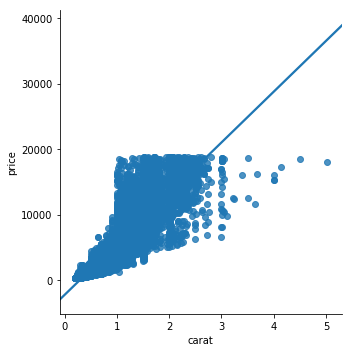

In [27]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.lmplot (x='carat', y='price', data=df)

In [28]:
#number of observation per price group/type
pd.value_counts (df['price_type'])

Medium      24702
Low         14524
High         9492
Too High     5222
Name: price_type, dtype: int64

In [30]:
#average carat by price type
df.groupby('price_type')['carat'].mean()

price_type
Low         0.334937
Medium      0.712814
High        1.209044
Too High    1.741111
Name: carat, dtype: float64

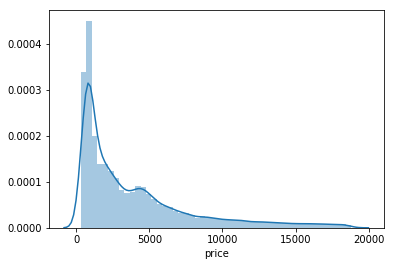

In [31]:
#create a histogram of the distribution of price
sns.distplot (df['price'])

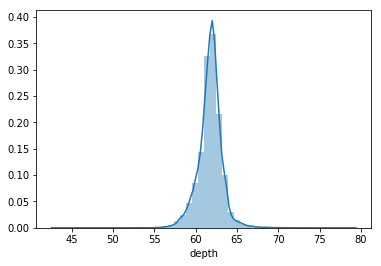

In [32]:
#a histogram of the distribution of depth
sns.distplot (df['depth'])

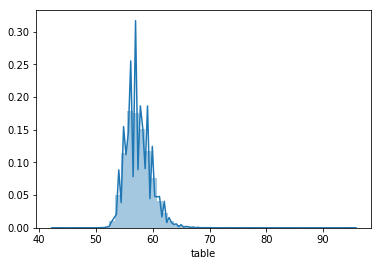

In [34]:
#a histogram of the distribution of tableS
sns.distplot (df['table'])